In [8]:

using Pkg
Pkg.add("Plots")
using Plots


   Resolving package versions...
  No Changes to `C:\CMU_Spring\OptimalSailboat\Project.toml`
  No Changes to `C:\CMU_Spring\OptimalSailboat\Manifest.toml`
Precompiling project...
  ✓ OpenSSL
  ✓ Qt6Base_jll
  ✓ FFMPEG_jll
  ✓ FFMPEG
  ✓ GR_jll
  ✓ HTTP
  ✓ GR
  ✓ Plots
  8 dependencies successfully precompiled in 38 seconds (138 already precompiled)
  6 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


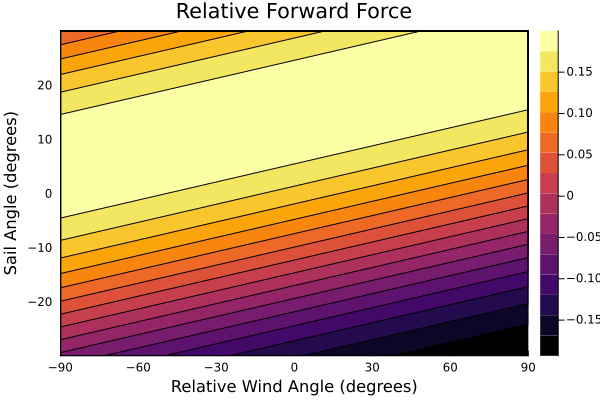

In [9]:
# Refering the following paper for the model
# Roll Stabilization Control of Sailboats
# https://www.sciencedirect.com/science/article/pii/S2405896316320833

# Assuming Constant Wind Speed
V_ws = 5.0  # m/s, example constant wind speed


function S_prime_x(βws, λ, Vws)
    # Model for S'_x
    # Aerodynamic model assuming optimal efficiency at some angle offset
    # Optimal angle will be different for different sailboats and should be gotten from a lookup table
    # This is the polar diagram of the sailboat, and is often provided by the manufacturer
    # We will assume an optimal angle offset of 45 degrees for demonstration

    optimal_angle_offset = π / 4  
    return cos(βws - λ - optimal_angle_offset) * Vws
end

# Calculate S'_{x,r}
function S_prime_x_r(βws, λ, Vws)
    force_x = S_prime_x(βws, λ, Vws)
    return force_x / Vws^2
end

βws_values = range(deg2rad(-90), deg2rad(90), length=100) # Relative wind angle
λ_values = range(deg2rad(-30), deg2rad(30), length=100) # Sail angle
Z = [S_prime_x_r(βws, λ, V_ws) for βws in βws_values, λ in λ_values]


p = contour(βws_values .* 180 / π, λ_values .* 180 / π, Z,
            title="Relative Forward Force",
            xlabel="Relative Wind Angle (degrees)",
            ylabel="Sail Angle (degrees)",
            fill=true)

# Display the plot
display(p)


In [13]:
# The sail is modeled as a 2D airfoil

function angle_of_attack(λ, βws)
    # Calculate the angle of attack
    α = βws - λ + π
    return α
end

function CL(α)
    # Calculate the lift coefficient
    # This is a simple model that assumes lift is proportional to the angle of attack
    # will be different for different sailboats 
    return α
end

function SL(λ, Vws, A)
    # Calculate the lift force
    ρ = 1.225  # kg/m^3, air density
    Fl = 0.5 * ρ * Vws^2 * A * CL(angle_of_attack(λ, 0))

end

function SD(λ, Vws)
    # Calculate the drag force
    # This is a simple model that assumes drag is proportional to the square of the wind speed
    # The drag coefficient is assumed to be 1
    return Vws^2 * cos(λ)
end



Normalized surge force Sx': -0.3535533905932736
